In [16]:
import tensorflow as tf
import os

In [17]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [18]:
import cv2
import imghdr

In [19]:
data_dir='data'

In [20]:
image_exts=['jpeg','jpg','bmp','png']

In [109]:
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_dir):
        continue  # Skip if it's not a directory (e.g., .DS_Store)

    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)

        try:
            if not os.path.isfile(image_path):
                continue  # Skip if it's not a regular file (e.g., another directory)

            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            
            if tip not in image_exts:
                print('Image not in ext list: {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

In [123]:
import numpy as np
from matplotlib import pyplot as plt

In [146]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 450 files belonging to 2 classes.


In [147]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()
#Class 1 = DOG
#Class 0 = CAT


batch[1]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int32)

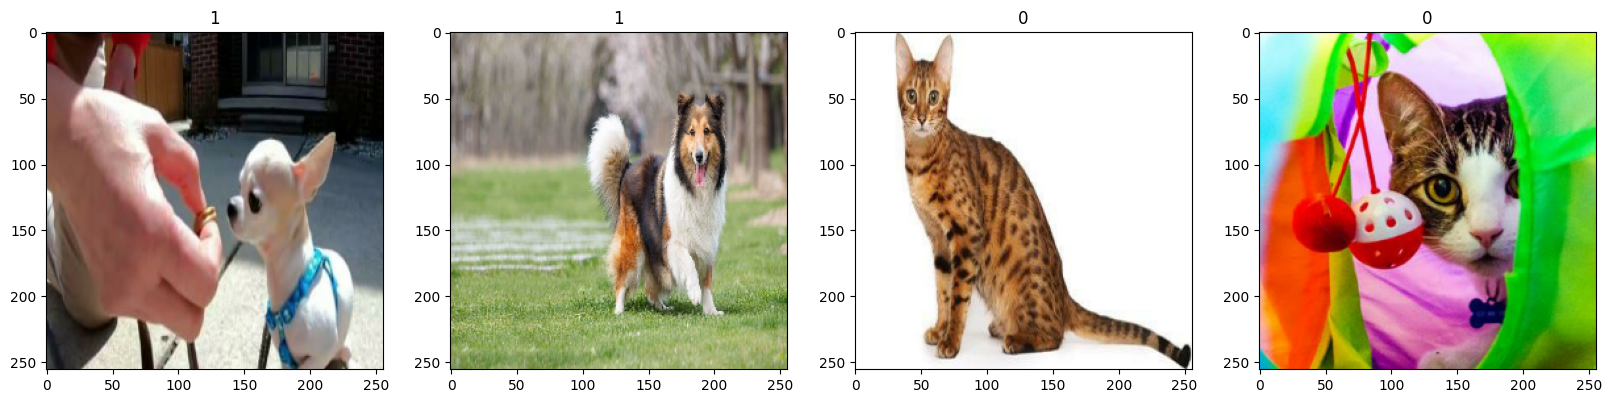

In [148]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [149]:
scaled=batch[0]/255

In [150]:
data=data.map(lambda x,y: (x/255,y))

In [151]:
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

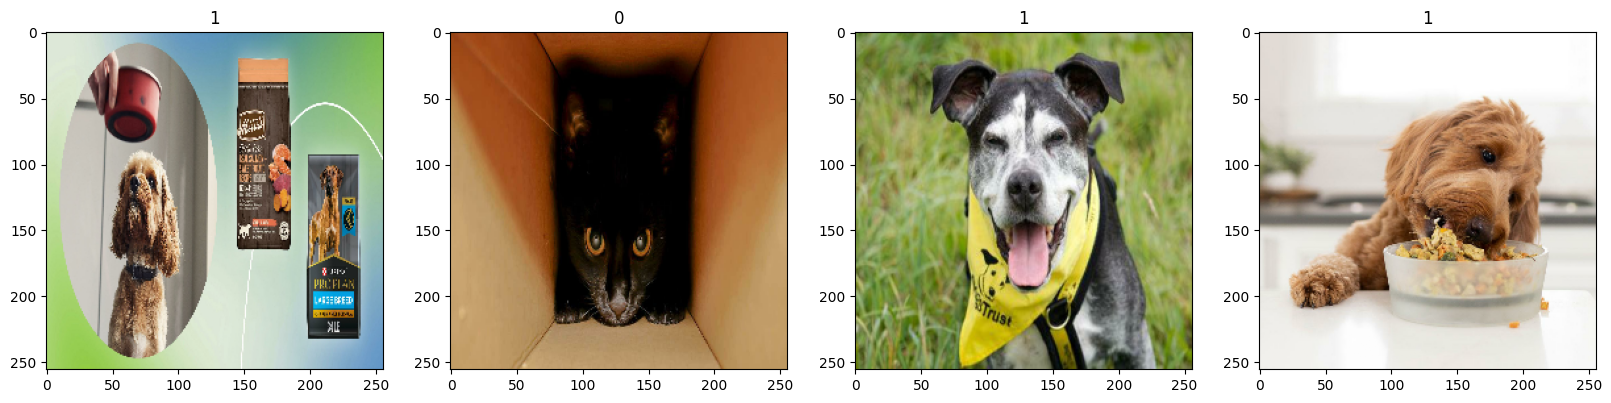

In [154]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [162]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [181]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

DEEP MODEL

In [175]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [177]:
model=Sequential()

In [182]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [183]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [184]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [185]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [187]:
hist=model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 5s 406ms/step - loss: 0.8501 - accuracy: 0.5406 - val_loss: 0.6874 - val_accuracy: 0.5833
Epoch 2/20
10/10 [==============================] - 4s 384ms/step - loss: 0.6759 - accuracy: 0.6281 - val_loss: 0.7201 - val_accuracy: 0.4062
Epoch 3/20
10/10 [==============================] - 4s 390ms/step - loss: 0.6599 - accuracy: 0.6187 - val_loss: 0.6321 - val_accuracy: 0.6979
Epoch 4/20
10/10 [==============================] - 4s 378ms/step - loss: 0.6256 - accuracy: 0.6469 - val_loss: 0.5285 - val_accuracy: 0.8229
Epoch 5/20
10/10 [==============================] - 4s 380ms/step - loss: 0.5063 - accuracy: 0.7625 - val_loss: 0.4868 - val_accuracy: 0.7604
Epoch 6/20
10/10 [==============================] - 4s 376ms/step - loss: 0.4430 - accuracy: 0.7937 - val_loss: 0.5219 - val_accuracy: 0.7188
Epoch 7/20
10/10 [==============================] - 4s 377ms/step - loss: 0.3375 - accuracy: 0.8625 - val_loss: 0.2226 - val_accuracy: 0.9688
Epoch 

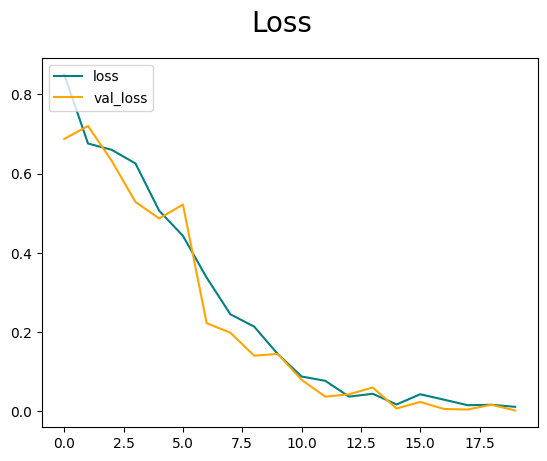

In [193]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc='upper left')
plt.show()

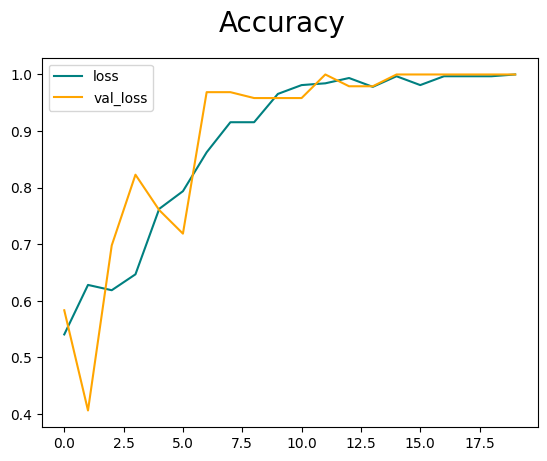

In [194]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='loss')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_loss')
fig.suptitle('Accuracy', fontsize =20)
plt.legend(loc='upper left')
plt.show()

EVALUATE PERFORMANCE

In [195]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [196]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [198]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 122ms/step


In [203]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


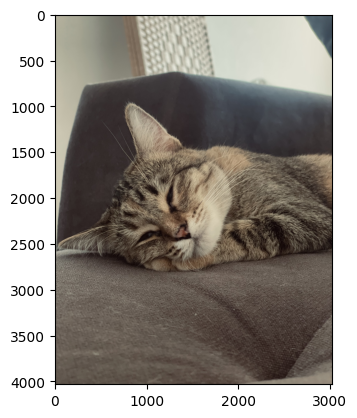

In [230]:
img=cv2.imread('cattest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

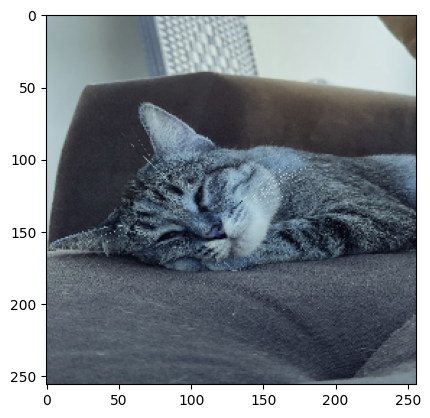

In [231]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [232]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [233]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 21ms/step


In [234]:
yhat

array([[0.00146255]], dtype=float32)

In [235]:
if yhat>0.5:
    print('Predicted class is DOG')
else:
    print('Predicted class is CAT')

Predicted class is CAT


In [239]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','dog_or_cat_model.h5'))

/Users/zhakhanger/miniforge3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [240]:
new_model=load_model(os.path.join('models','dog_or_cat_model.h5'))

In [241]:
new_model